# Capstone Project - The Battle of Neighborhoods

Coursera Capstone Project: <b>The Battle of Neighborhoods</b>

## Table of contents

- Introduction 
- Data
- Methodology
- Exploratory Data Analysis
- Results
- Discussion
- Conclusion

## 1. Introduction

California's second largest city and the United States' eighth largest, San Diego boasts a citywide population of nearly 1.3 million residents and more than 3 million residents countywide. Within its borders of 4,200 sq. miles, San Diego County encompasses 18 incorporated cities and numerous other charming neighborhoods and communities, including downtown's historic Gaslamp Quarter, Little Italy, Coronado, La Jolla, Del Mar, Carlsbad, and Chula Vista just to name a few. 

San Diego is renowned for its idyllic climate, 70 miles of pristine beaches and a dazzling array of world-class family attractions. Popular attractions include the world-famous San Diego Zoo and San Diego Zoo Safari Park, SeaWorld San Diego and LEGOLAND California. The sunny weather makes San Diego a hot spot for vacationers of all ages from around the world. 

But the city is not only about tourism and beach holidays. Thanks to the spirit of collaboration, plenty of qualified employees, and favorable conditions for entrepreneurship, San Diego is a good city to start a business. 

The economy of the San Diego county region is going strong. San Diego, having GDP of over $250 million, made it to the top 20 major cities in the United States.

Being so attractive economically and geographically, San Diego draws in people like a magnet. Business owners often consider San Diego city as a good destination for moving and expanding their business because of housing and low cost of doing business as compared to Los Angeles and San Francisco areas. Also, its year-around good weather tremendously helps small businesses that rely on foot traffic.

As a resident of this city, I decided to use San Diego in my project.

### 1.1 Business Problem

As <b>San Diego</b> receives people from all around the world, and people love to try new food, we will try to find an adequate location for opening up an <b><i>Italian Restaurant</i></b> in <b>San Diego</b>. Finding a proper location for a restaurant is crucial for business success. Hence, to select the right location for the restaurant, we will consider following elements:

1. <b>Know the neighborhood</b>, specifically, who else is doing business in the neighborhood 
- <b>Find a place which is not crowded with similar restaurants in vicinity</b>
- <b>Accessibility and visibility</b> of the location
- <b>Population base</b> to know the foot traffic or car traffic in the area to support the business
- <b>Parking</b> for the customers, and 
- <b>Low crime rate</b> in the area as high crime rates can make potential customers uncomfortable to visit the restaurant due to fears over public safety.

Our objective is to discover <b>a few most promising neighborhoods</b> based on above-mentioned criteria using data science skills, and present them with statistics so that the stakeholders can select the precise location for their restaurant.

### 1.2 Interest

Our target stakeholders are the <b>restaurant entrepreneurs</b> who would be interested in starting a restaurant in San Diego, California.

## 2. Data

To address the problem, we can list the required data as below:
1. I have scraped San Diego neighborhoods data from wikipedia (https://en.wikipedia.org/wiki/Template:Neighborhoods_of_San_Diego) uisng '<b>BeautifulSoup</b>' library and processed the data in order to use this in this project.
- Python <b>geopy</b> library is used to obtain the <b>geographical coordinates-- latitude and longitude of San Diego</b> and other addresses of interest.
-  <b>Forsquare API</b> is used to get the most common <b>venues of given Neighborhoods of San Diego</b>.
- I have collected some demographical information as well as property facts data such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>, <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> for each location of interest from below links:
    - https://www.niche.com/places-to-live/c/san-diego-county-ca/
    - https://www.trulia.com/CA/San_Diego/

## 3. Methodology

I have used
- python <b>geopy</b> library to obtain the <b>geographical coordinates of San Diego</b>.
- the <b>Foursquare API</b> to segment and explore the neighborhoods as well as the latitude and longitude coordinates of each neighborhood. For this, I have set the limit as 100 and the radius 1000 meter for each neighborhood from their given latitude and longitude information. 
- the <b>Folium</b> library to visualize the neighborhoods in San Diego with neighborhoods superimposed on top.
- the <b>explore</b> function to get the most common venue categories in each neighborhood and then used this feature to group the neighborhoods into clusters with the help of <b><i>K</i>-means clustering</b> algorithm. 
- the <b>Folium</b> library to visualize the neighborhoods in San Diego and their emerging clusters.
- the demographical as well as property facts data about San Diego neigborhoods to rate them based on these data, and merge them with related clusters of neighborhoods.
- the <b>Folium</b> library to visualize final selected locations for opening up a restaurant based on the criteria mentioned in the section-1.1.

## 4. Exploratory Data Analysis

### A. Import required libraries

In [199]:
# Import required libraries
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from sklearn.cluster import KMeans # machine learning library
import folium # map rendering library
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

print("Libraries imported.")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Libraries imported.


### B. Import and explore Dataset

#### Load the data

In order to segment the neighborhoods and explore them, we will essentially need a dataset containing neighborhoods in San Diego as well as the latitude and longitude coordinates of each neighborhood.

In [2]:
# Inport the dataset into pandas dataframe
sd_df = pd.read_csv("../data/sd_neighborhoods.csv", engine='python')
sd_df.head()

,Neighborhoods,Address,Location,Coordinates,Latitude,Longitude
0,Bay Ho,"Bay Ho,San Diego,CA","San Diego, Casablanca, Regla, La Habana, La Ha...","(32.8241, -117.1937, 0.0)",32.824100,-117.193700
1,Bay Park,"Bay Park,San Diego,CA","Bay Park, San Diego, San Diego County, Califor...","(32.7846385, -117.2026047, 0.0)",32.784638,-117.202605
2,Carmel Valley,"Carmel Valley,San Diego,CA","Carmel Valley, San Diego, San Diego County, Ca...","(32.9434337, -117.2139794, 0.0)",32.943434,-117.213979
3,Clairemont,"Clairemont,San Diego,CA","Clairemont, San Diego, San Diego County, Calif...","(32.8195052, -117.1823399, 0.0)",32.819505,-117.182340
4,Del Mar Heights,"Del Mar Heights,San Diego,CA","Del Mar Heights, San Diego, San Diego County, ...","(32.9488105, -117.250785, 0.0)",32.948811,-117.250785


In [3]:
# create a new dataframe with related data
sd_neighborhoods = sd_df[['Neighborhoods', 'Latitude', 'Longitude']]
sd_neighborhoods.head()

,Neighborhoods,Latitude,Longitude
0,Bay Ho,32.824100,-117.193700
1,Bay Park,32.784638,-117.202605
2,Carmel Valley,32.943434,-117.213979
3,Clairemont,32.819505,-117.182340
4,Del Mar Heights,32.948811,-117.250785


#### Data Pre-processing

Check if dataset has any missing value.

In [4]:
# Get the info
sd_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhoods  121 non-null    object 
 1   Latitude       107 non-null    float64
 2   Longitude      107 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


We can observe that the column <b>Latitude</b> and <b>Longitude</b> have <b>$14$</b> missing values.

In [6]:
# Handling the missing value
# drop rows with missing values
sd_neighborhoods.dropna(axis=0, how ='any')
sd_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 120
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhoods  107 non-null    object 
 1   Latitude       107 non-null    float64
 2   Longitude      107 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [7]:
# Get the number of neighborhoods
print("Number of neighborhoods: {}".format(len(sd_neighborhoods['Neighborhoods'].unique())))

Number of neighborhoods: 107


#### Create a map of San Diego with neighborhoods superimposed on top

We have used <b>geopy</b> library to get the latitude and longitude values of <b>San Diego</b> City. Then, we have created map of <b>San Diego</b> using latitude and longitude values with <b>neighborhoods</b> superimposed on top.

In [8]:
# get the latitude and longitude values of San Diego
address = 'San Diego, CA'

# define an instance of the geocoder
geolocator = Nominatim(user_agent='sd')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of San Diego are: {}, {}.".format(latitude, longitude))

The geographical coordinates of San Diego are: 32.7174202, -117.1627728.


In [9]:
# create map of San Diego using latitude and longitude values
sd_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(sd_neighborhoods['Latitude'], sd_neighborhoods['Longitude'], sd_neighborhoods['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(sd_map)

# display the map
sd_map

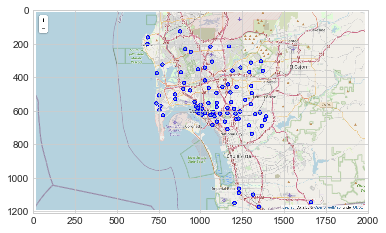

In [69]:
# display the static figure of San Diego map
image = mpimg.imread("../images/sd_map_fig1.png")
plt.imshow(image)
plt.show()

### C. Explore Neighborhoods in San Diego

I have used the <b>Foursquare API</b> to explore the neighborhoods and segment them. I set the limit as 100 venue and the radius 1000 meter for each neighborhood from their given latitude and longitude value. We have written two functions - <b>get_category</B>() to extract the category of the venue, and <b>get_nearby_venues</b>() to get all the nearby venues in the neighborhoods. Then, we have converted relevant data into a pandas dataframe containing 
columns - <b>Neighborhood</b>, <b>Neighborhood_Lat</b>, <b>Neighborhood_Lng</b>, <b>Venue</b>, <b>Venue_Lat</b>, <b>Venue_Lng</b>, <b>Venue_Category</b>.

##### Define Foursquare Credentials and Version

Call the function <b>get_nearby_venues()</b> to get all the nearby venues in each neighborhood in San Diego

In [15]:
# call the function get_nearby_venues() to get all the nearby venues in San Diego Neighborhoods
venues_in_sd = get_nearby_venues(names=sd_neighborhoods['Neighborhoods'],
                                   latitudes=sd_neighborhoods['Latitude'],
                                   longitudes=sd_neighborhoods['Longitude']
                                  )

# Display the dataframe
venues_in_sd.head()

,Neighborhoods,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.8241,-117.1937,Mt. Etna Neighborhood Park,32.822739,-117.191499,Playground
1,Bay Ho,32.8241,-117.1937,John Muir Language Academy,32.823418,-117.193544,Elementary School
2,Bay Ho,32.8241,-117.1937,Hurst Dental Care,32.826343,-117.190943,Dentist's Office
3,Bay Ho,32.8241,-117.1937,QLP Locksmith,32.822519,-117.183990,Locksmith
4,Bay Ho,32.8241,-117.1937,Circle K,32.822577,-117.183807,Convenience Store


Let's get the total number of venues returned by Foursquare.

In [16]:
print('Total {} venues ere returned by Foursquare.'.format(venues_in_sd.shape[0]))

Total 10283 venues ere returned by Foursquare.


Let's get the number of venues returned for each neighborhood and plot a barchart with the result.

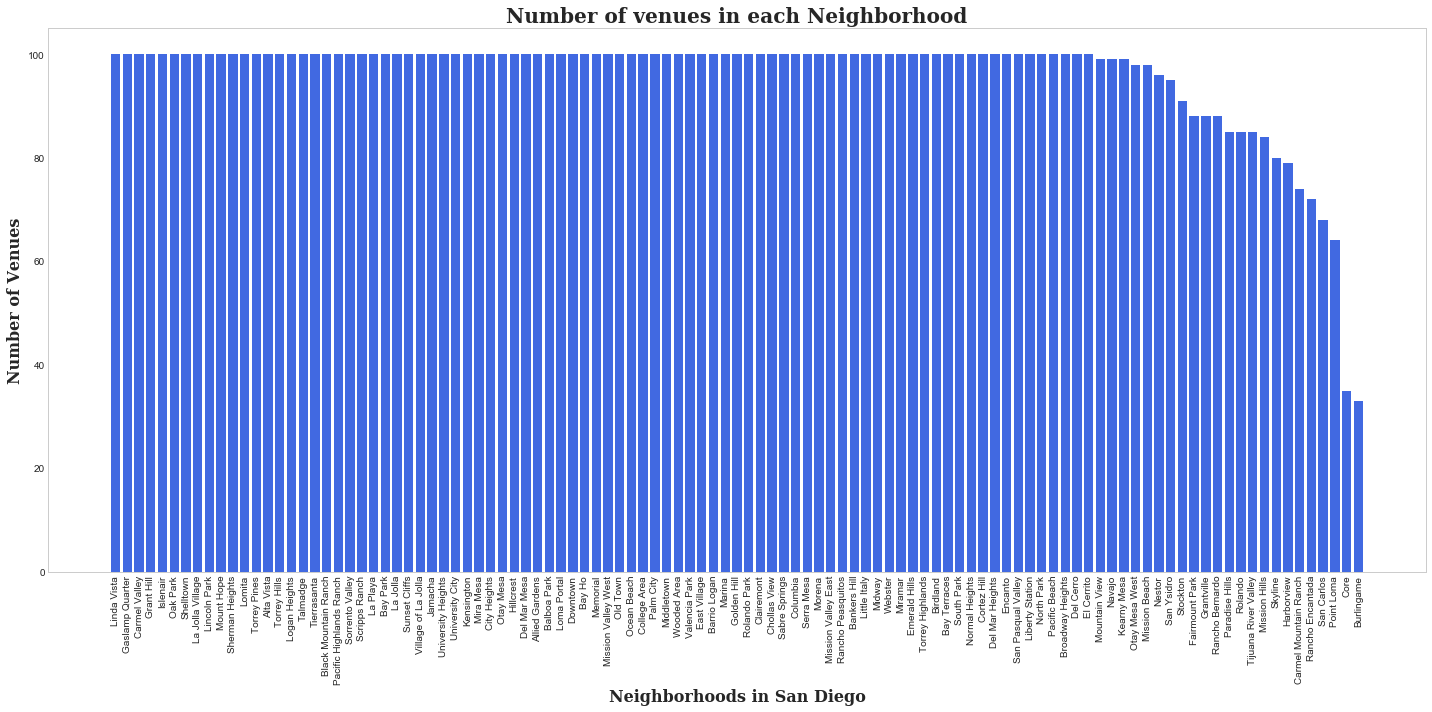

In [18]:
# Plot the barcharts - 1. with top 20 neighborhoods with highest number of venues, and
# 2. with bottom 20 neighborhoods with least number of venues
font_param = {'size': 16, 'fontweight': 'semibold',
              'family': 'serif', 'style': 'normal'}

plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(venues_by_neighborhoods['Neighborhoods'], height=venues_by_neighborhoods['Venue Counts'], align='center', color='royalblue')
ax.tick_params(axis='x', rotation=90)
plt.title('Number of venues in each Neighborhood', font_param, fontsize=20)
plt.xlabel('Neighborhoods in San Diego', font_param)
plt.ylabel('Number of Venues', font_param)

plt.grid(False)
plt.tight_layout()

# display plot
plt.show()

In the above barplot, we can see that <b>Midway</b>, <b>Kearny Mesa</b>, <b>Serra Mesa</b>, <b>Mira Mesa</b>, <b>Miramar</b>, <b>Torrey Pines</b>, <b>Hillcrest</b>, <b>Village of La Jolla</b>, and many other neighborhoods have reached the <b>100</b> limit of venues. On the other hand, <b>Burlingame</b> and <b>Core</b> have less than <b>50</b> venues. 

In [20]:
# Get the number of unique venue category
print("{} unique venue category.".format(len(venues_in_sd['Venue_Category'].unique())))

510 unique venue category.


### D. Analyze Each Neighborhood

In this project, <b>we have selected all the neighborhoods that have $100$ or more venues</b> for further analysis. Let's create a new dataframe with selected neighborhoods and get the list of <b>top 10 venue category</B> for each selected neighborhood.

In [22]:
# get the number of neighborhoods having 100 or more venues
print("The number of neighborhoods having 100 or more venues: {}".format(len(sd_venues_100['Neighborhoods'])))

The number of neighborhoods having 100 or more venues: 84


In [23]:
# let's create new dataframe with the neighborhoods that have 100 or more venues
sd_venues = venues_in_sd[venues_in_sd['Neighborhoods'].isin(sd_venues_100['Neighborhoods'])]
sd_venues.head()

,Neighborhoods,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.8241,-117.1937,Mt. Etna Neighborhood Park,32.822739,-117.191499,Playground
1,Bay Ho,32.8241,-117.1937,John Muir Language Academy,32.823418,-117.193544,Elementary School
2,Bay Ho,32.8241,-117.1937,Hurst Dental Care,32.826343,-117.190943,Dentist's Office
3,Bay Ho,32.8241,-117.1937,QLP Locksmith,32.822519,-117.183990,Locksmith
4,Bay Ho,32.8241,-117.1937,Circle K,32.822577,-117.183807,Convenience Store


In [25]:
# get the unique venue gategoris
print("No of unique venues: {}".format(len(sd_venues['Venue_Category'].unique())))

No of unique venues: 491


In [78]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = sd_grouped['Neighborhoods']

# fill with value
for idx in np.arange(sd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[idx, 1:] = get_popular_venues(sd_grouped.iloc[idx, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allied Gardens,Church,Bank,Office,Gas Station,Salon / Barbershop,Sports Bar,Mexican Restaurant,Liquor Store,Italian Restaurant,Automotive Shop
1,Alta Vista,Playground,Professional & Other Places,General Entertainment,Event Space,Lounge,Gym / Fitness Center,Community Center,Basketball Court,Bridge,Park
2,Balboa Park,Food Truck,Garden,Building,History Museum,Park,Café,Non-Profit,Flower Shop,Art Gallery,Zoo Exhibit
3,Bankers Hill,Office,Coworking Space,Doctor's Office,Laundry Service,Lawyer,Residential Building (Apartment / Condo),Bank,Massage Studio,Building,Spa
4,Barrio Logan,Automotive Shop,Office,Building,Miscellaneous Shop,Fast Food Restaurant,Tattoo Parlor,Salon / Barbershop,Bus Line,Boat or Ferry,Gas Station


In the above dataframe, we can see that there are some <i>common venue categories</i> in neighborhoods. We will categorize neighborhoods into $k$ groups of similarity based on these common venue categories. For this, I have chosen <b><i>K</i>-means clustering</b> algorithm, an unsupervised learning algorithm, to cluster the neighborhood into $k$ clusters, where $k$ is the optimal number of clusters.

<b><i>K</i>-means clustering</b> is a method of vector quantization, that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

### Cluster Neighborhoods using <i>K</i>-means

To perform the <b><i>K</i>-means clustering</b>, first, we have to determine the optimal number of clusters. In order to determine the optimal number of clusters $k$, I have used following two methods:
- <b>Elbow method</b> which gives the value of $k$ such that the total <b>within-cluster variation (or error) is minimum</b>. This method calculates the <i>Within-Cluster-Sum of Squared Errors</i> (<b>WSS</b>) for different values of $k$, and choose the $k$ for which <b>WSS</b> becomes first starts to diminish.
- <b>Silhouette Method</b> which measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Also it shows the optimal number of clusters.

In [79]:
# !pip install kneed
from kneed import KneeLocator

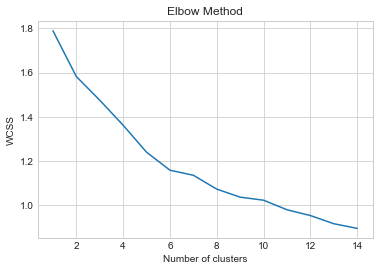

In [80]:
# drop the column 'Neighborhood'
cluster_data = sd_grouped.drop('Neighborhoods', 1)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=500, random_state=4)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
# Identify the elbow point in the wcss curve using KneeLocator()
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
print("Optimal value of k: {}".format(kl.elbow))

Optimal value of k: 6


After analyzing above-mentioned two methods, I have set the <b>number of clusters</b> to $6$ ($k=6$) based on the <b>Elbow method</b>.

### Modeling

In [82]:
# set number of clusters
k = 6

# drop the column 'Neighborhood'
sd_cluster = sd_grouped.drop('Neighborhoods', 1)

# Initialize and fit the model
kmeans = KMeans(n_clusters=k, random_state=4).fit(sd_cluster)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

print(labels)

[1 1 1 0 0 3 1 1 3 1 1 1 1 1 3 1 0 0 3 1 1 1 0 2 0 1 1 1 5 2 1 1 1 3 3 2 0
 1 1 1 1 3 1 2 1 0 2 3 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 4 1 1 1 1 0 1 1 5
 1 1 0 0 1 0 3 0 0 1]


Let's create a new dataframe that includes the <b>cluster labels</b> as well as the <b>top 10 venues</b> for each neighborhood.

In [83]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sd_merged = sd_neighborhoods[sd_neighborhoods['Neighborhoods'].isin(sd_venues_100['Neighborhoods'])]

# merge sd_grouped with sd_neighborhoods to add latitude/longitude for each neighborhood
sd_merged = sd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')
print(list(sd_merged['Neighborhoods']))
sd_merged.head()

['Bay Ho', 'Bay Park', 'Carmel Valley', 'Clairemont', 'Del Mar Heights', 'Del Mar Mesa', 'La Jolla', 'La Jolla Village', 'Pacific Beach', 'Pacific Highlands Ranch', 'Torrey Hills', 'Torrey Pines', 'University City', 'Village of La Jolla', 'Birdland', 'Mission Valley East', 'Allied Gardens', 'Del Cerro', 'Serra Mesa', 'Tierrasanta', 'Downtown', 'Columbia', 'Cortez Hill', 'East Village', 'Gaslamp Quarter', 'Little Italy', 'Marina', 'Balboa Park', 'Bankers Hill', 'Barrio Logan', 'Golden Hill', 'Grant Hill', 'Logan Heights', 'Memorial', 'Middletown', 'Sherman Heights', 'South Park', 'Alta Vista', 'Bay Terraces', 'Broadway Heights', 'Chollas View', 'Emerald Hills', 'Encanto', 'Jamacha', 'Lincoln Park', 'Lomita', 'Mount Hope', 'Oak Park', 'Shelltown', 'Valencia Park', 'Black Mountain Ranch', 'Mira Mesa', 'Miramar', 'Rancho Peasquitos', 'Sabre Springs', 'San Pasqual Valley', 'Scripps Ranch', 'Sorrento Valley', 'Torrey Highlands', 'Hillcrest', 'Linda Vista', 'Mission Valley West', 'Morena', 'N

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo)
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery
2,Carmel Valley,32.943434,-117.213979,1,Gym / Fitness Center,Pool,Residential Building (Apartment / Condo),Trail,Gym,Park,Church,Elementary School,Stables,Other Great Outdoors
3,Clairemont,32.819505,-117.182340,3,Doctor's Office,Dentist's Office,Bank,Chiropractor,Office,Mobile Phone Shop,Medical Center,ATM,Bakery,Credit Union
4,Del Mar Heights,32.948811,-117.250785,1,Office,Trail,Residential Building (Apartment / Condo),Dentist's Office,Elementary School,Salon / Barbershop,Deli / Bodega,Business Service,Ice Cream Shop,Building


Now, let's visualize the resulting clusters.

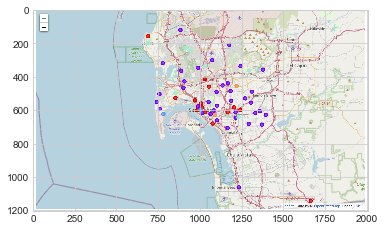

In [85]:
# display the static figure of San Diego map with resulting clusters
image = mpimg.imread("../images/sd_map_clusters_fig7.png")
plt.imshow(image)
plt.show()

### E. Explore Clusters

Let's explore each cluster with the top 10 common venues.

#### Cluster-0

In [117]:
cluster0 = sd_merged.loc[sd_merged['Cluster Labels'] == 0, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster0.shape)
cluster0.head(3)

(20, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Torrey Hills,Office,Building,Tech Startup,Residential Building (Apartment / Condo),Coworking Space,Coffee Shop,Doctor's Office,Pool,Hotel,Conference Room
1,Torrey Pines,Office,College Academic Building,College Lab,Building,Coworking Space,Café,Non-Profit,College Residence Hall,General College & University,Medical Lab
2,Village of La Jolla,Office,Salon / Barbershop,Chiropractor,Dentist's Office,Spa,Parking,Building,Lawyer,Rental Car Location,Coffee Shop


#### Cluster-1

In [87]:
cluster1 = sd_merged.loc[sd_merged['Cluster Labels'] == 1, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster1.shape)
cluster1.head(3)

(47, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Park,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery
1,Carmel Valley,Gym / Fitness Center,Pool,Residential Building (Apartment / Condo),Trail,Gym,Park,Church,Elementary School,Stables,Other Great Outdoors
2,Del Mar Heights,Office,Trail,Residential Building (Apartment / Condo),Dentist's Office,Elementary School,Salon / Barbershop,Deli / Bodega,Business Service,Ice Cream Shop,Building


#### Cluster-2

In [88]:
cluster2 = sd_merged.loc[sd_merged['Cluster Labels'] == 2, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster2.shape)
cluster2.head(3)

(5, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marina,Government Building,Office,Lawyer,Building,Hotel,Courthouse,Gym / Fitness Center,Café,Credit Union,Coffee Shop
1,Hillcrest,Government Building,Office,Lawyer,Building,Hotel,Courthouse,Gym / Fitness Center,Café,Credit Union,Coffee Shop
2,La Playa,Government Building,Boat or Ferry,Military Base,Beach,Food Truck,Athletics & Sports,Office,Harbor / Marina,American Restaurant,Park


#### Cluster-3

In [119]:
cluster3 = sd_merged.loc[sd_merged['Cluster Labels'] == 3, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster3.shape)
cluster3.head(3)

(9, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ho,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo)
1,Clairemont,Doctor's Office,Dentist's Office,Bank,Chiropractor,Office,Mobile Phone Shop,Medical Center,ATM,Bakery,Credit Union
2,La Jolla,Dentist's Office,Doctor's Office,Medical Center,High School,Cosmetics Shop,Hotel,Gym / Fitness Center,Office,Automotive Shop,Church


#### Cluster-4

In [90]:
cluster4 = sd_merged.loc[sd_merged['Cluster Labels'] == 4, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster4.shape)
cluster4.head(3)

(1, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Pasqual Valley,Zoo Exhibit,Exhibit,Scenic Lookout,Playground,Garden,Other Great Outdoors,Bar,Zoo,Café,Building


#### Cluster-5

In [91]:
cluster5 = sd_merged.loc[sd_merged['Cluster Labels'] == 5, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)
print(cluster5.shape)
cluster5.head(3)

(2, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Grant Hill,Automotive Shop,Building,Miscellaneous Shop,Salon / Barbershop,Mexican Restaurant,Pharmacy,Candy Store,Auto Workshop,Bakery,Convenience Store
1,Talmadge,Automotive Shop,Residential Building (Apartment / Condo),Mexican Restaurant,Dentist's Office,Miscellaneous Shop,Doctor's Office,Salon / Barbershop,Laundromat,Laundry Service,Gas Station


Let's estimate the number of <b>1st Most Common Venue</b> in each cluster and create a barchart. Based on barchart, we will assign a name to each cluster.

In [92]:
# create a new dataframe containing Cluster Labels, 1st Most Common Venue, Counts
common_vaneus_cluster = sd_merged.groupby('Cluster Labels')['1st Most Common Venue'].value_counts().reset_index(name='Counts')
common_vaneus_cluster.head()

,Cluster Labels,1st Most Common Venue,Counts
0,0,Office,18
1,0,Automotive Shop,1
2,0,Rental Car Location,1
3,1,Residential Building (Apartment / Condo),5
4,1,Salon / Barbershop,5


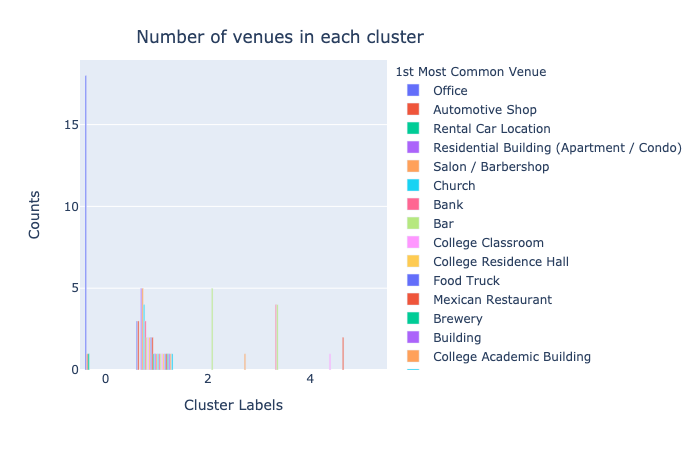

In [101]:
# plot the group bar chart
import plotly.express as px 

fig = px.bar(common_vaneus_cluster, x="Cluster Labels", y="Counts", 
             color="1st Most Common Venue", hover_data=['1st Most Common Venue'], 
             barmode = 'group') 

fig.update_layout(
    title={
        'text': "Number of venues in each cluster",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
# save figure
fig.write_image("../images/sd_venue_numbers_each_cluster_fig10.png")
fig.show()
fig.show(renderer="png")

We have <b>6 clusters</b> of neighborhoods. Let's assign name to each cluster as follows: 
1. Cluster-0: <b>offices and automotive shops</b> 
- Cluster-1: <b>Multiple Venues - residential buildings, college and academic buildings, Salon, office, bank, restaurants, park, salon</b>       
- Cluster-2: <b>Government buildings</b>
- Cluster-3: <b>Doctor's and dentist's place</b> 
- Cluster-4: <b>Zoo exhibit</b> 
- Cluster-5: <b>Automotive shops</b>

In the above barchart, we have observed that <b>Cluster-0</b> has offices, <b>Cluster-1</b> has multiple venues such as residential buildings, college and academic buidings, Salon, office, bank, restaurants, and marketplace etc, and <b>Cluster-3</b> has doctor's and dentist's place. In the following sections, we will perform explanatory data analysis and derive the following information about each neighborhood of <b>Cluster-0</b>, <b>Cluster-1</b>, and <b>Cluster-3</b>:

- All the neighborhoods
- Number and category of restaurants
- Population base: Foot or car traffic
- Parking
- Demographical information such as population, housing, crime rate etc.

All these elements are as crucial to a restaurant's success as great food and service.

### E.1 Get all the neighborhoods in Cluster-0

In [120]:
clus0_neighborhoods = cluster0['Neighborhoods']
print("Number of neighborhoods in Cluster-0: {}\n".format(clus0_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-0:\n")
print(list(clus0_neighborhoods))

Number of neighborhoods in Cluster-0: 20

Neighborhoods in Cluster-0:

['Torrey Hills', 'Torrey Pines', 'Village of La Jolla', 'Mission Valley East', 'Columbia', 'Cortez Hill', 'East Village', 'Bankers Hill', 'Barrio Logan', 'Middletown', 'Emerald Hills', 'Mount Hope', 'Miramar', 'Sabre Springs', 'Sorrento Valley', 'Mission Valley West', 'Liberty Station', 'University Heights', 'Webster', 'Otay Mesa']


#### Get the number and category of restaurants in each Neighborhood of Cluster-0

In [122]:
# get the total number of restaurants in Cluster-0
print("Total number of restaurants in Cluster-0: {}".format(clus0_restaurants.shape[0]))

Total number of restaurants in Cluster-0: 97


In [203]:
# Get the number of unique restaurant category
print("Number of unique restaurants category in Cluster-0: {}".format(len(clus0_restaurants['Venue_Category'].unique())))

Number of unique restaurants category in Cluster-0: 22


Let's find the number of restaurants of each category in each neighborhood.

In [202]:
# merge clus1_restaurants with sd_merged on 'Neighborhoods'
clus1_rest_df = sd_merged.join(clus1_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
clus1_rest_df.head(3)

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),NaN,NaN,NaN,NaN,NaN,NaN
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery,32.784638,-117.202605,Offshore Tavern & Grill,32.785850,-117.206230,American Restaurant
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery,32.784638,-117.202605,Luce Bar & Kitchen,32.781621,-117.206978,New American Restaurant


In [130]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster0 = clus0_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster0.head(5)

,Neighborhoods,Restaurant Category,Counts
0,Bankers Hill,American Restaurant,1
1,Bankers Hill,Mexican Restaurant,1
2,Barrio Logan,Fast Food Restaurant,4
3,Barrio Logan,Filipino Restaurant,1
4,Barrio Logan,Italian Restaurant,1


Let's plot the number of restaurants in each neighborhood of Cluster-0

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

In [132]:
# create a dataframe with neighborhoods which have no Italian restaurants (Cluster-0)
hoods_italian_rests = restaurants_cluster0[restaurants_cluster0['Restaurant Category'] == 'Italian Restaurant'].reset_index(drop=True)
list_italian_rests = hoods_italian_rests['Neighborhoods'].unique()

# filter the neighborhoods 
index_names = restaurants_cluster0[restaurants_cluster0['Neighborhoods'].isin(list(list_italian_rests))].index
hoods_no_italian_rests = restaurants_cluster0.drop(index_names)
list_no_italian_rests = hoods_no_italian_rests['Neighborhoods'].unique()

print("Neighborhoods with no Italian restaurants:")
print(list(list_no_italian_rests))
print('')
print("Number of neighborhoods with no Italian restaurants in Cluster-0: {}".format(len(list_no_italian_rests)))

Neighborhoods with no Italian restaurants:
['Bankers Hill', 'Cortez Hill', 'East Village', 'Emerald Hills', 'Miramar', 'Mission Valley East', 'Mission Valley West', 'Mount Hope', 'Otay Mesa', 'Sabre Springs', 'Sorrento Valley', 'Torrey Hills', 'University Heights']

Number of neighborhoods with no Italian restaurants in Cluster-0: 13


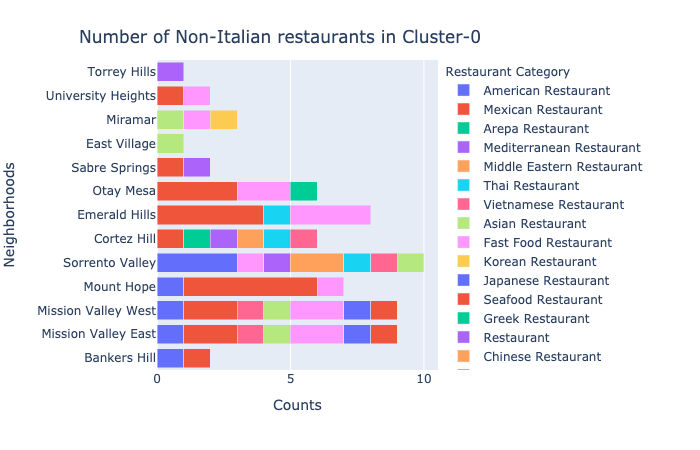

In [133]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-0",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})

# save figure
fig.write_image("../images/sd_cluster0_hoods_non_italian_rests_fig20_a.png")
fig.show()
fig.show(renderer="png")

We have <b>13</b> neighborhoods within <b>Cluster-0</b> that have no Italian restaurants. From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. Sorrento Valley
- Mission Valley East
- Mission Valley West
- Cortez Hill

### E.2 Get all the neighborhoods in Cluster-1

In [102]:
clus1_neighborhoods = cluster1['Neighborhoods']
print("Number of neighborhoods in Cluster-1: {}\n".format(clus1_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-1:\n")
print(list(clus1_neighborhoods))

Number of neighborhoods in Cluster-1: 47

Neighborhoods in Cluster-1:

['Bay Park', 'Carmel Valley', 'Del Mar Heights', 'Del Mar Mesa', 'Pacific Beach', 'Pacific Highlands Ranch', 'University City', 'Allied Gardens', 'Serra Mesa', 'Tierrasanta', 'Downtown', 'Gaslamp Quarter', 'Little Italy', 'Balboa Park', 'Golden Hill', 'Logan Heights', 'Memorial', 'Sherman Heights', 'South Park', 'Alta Vista', 'Bay Terraces', 'Broadway Heights', 'Chollas View', 'Encanto', 'Jamacha', 'Lincoln Park', 'Lomita', 'Oak Park', 'Shelltown', 'Black Mountain Ranch', 'Rancho Peasquitos', 'Scripps Ranch', 'Torrey Highlands', 'Linda Vista', 'Morena', 'North Park', 'Ocean Beach', 'Old Town', 'Sunset Cliffs', 'Wooded Area', 'City Heights', 'College Area', 'Islenair', 'Kensington', 'Normal Heights', 'Rolando Park', 'Palm City']


#### Get the number and category of restaurants in each Neighborhood of Cluster-1

In [104]:
# get the total number of restaurants in Cluster-1
print("Total number of restaurants in Cluster-1: {}".format(clus1_restaurants.shape[0]))

Total number of restaurants in Cluster-1: 304


In [201]:
# Get the number of unique restaurant category
print("Number of unique restaurants category in Cluster-1: {}".format(len(clus1_restaurants['Venue_Category'].unique())))

Number of unique restaurants category in Cluster-1: 33


In [106]:
# Get all the unique restaurant category with numbers in Cluster-1
restaurant_category_clus1 = clus1_restaurants['Venue_Category'].value_counts().rename_axis('Restaurant Category').reset_index(name='Counts')
print("Top 5 Restaurant categories are:") 
restaurant_category_clus1.head(5)

Top 5 Restaurant categories are:


,Restaurant Category,Counts
0,Mexican Restaurant,87
1,Italian Restaurant,27
2,American Restaurant,23
3,Fast Food Restaurant,18
4,Chinese Restaurant,17


Let's find the number of restaurants of each category in each neighborhood.

In [110]:
# merge clus1_restaurants with sd_merged on 'Neighborhoods'
clus1_rest_df = sd_merged.join(clus1_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
clus1_rest_df.head(3)

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),NaN,NaN,NaN,NaN,NaN,NaN
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery,32.784638,-117.202605,Offshore Tavern & Grill,32.785850,-117.206230,American Restaurant
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery,32.784638,-117.202605,Luce Bar & Kitchen,32.781621,-117.206978,New American Restaurant


In [111]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster1 = clus1_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster1.head(5)

,Neighborhoods,Restaurant Category,Counts
0,Allied Gardens,Italian Restaurant,2
1,Allied Gardens,Mexican Restaurant,2
2,Allied Gardens,American Restaurant,1
3,Alta Vista,Restaurant,2
4,Alta Vista,Japanese Restaurant,1


Let's plot the number of restaurants in each neighborhood of Cluster-1

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

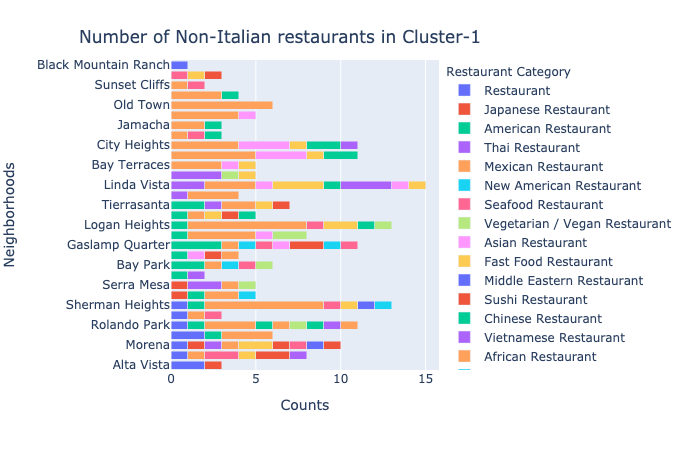

In [115]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-1",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})

# save figure
fig.write_image("../images/sd_cluster1_hoods_non_italian_rests_fig16_a.png")
fig.show()
fig.show(renderer="png")

We have <b>31</b> neighborhoods within <b>Cluster-1</b> that have no Italian restaurants. From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. Linda Vista
- Logan Heights
- Sherman Heights
- Rolando Park
- Gaslamp Quarter
- City Heights
- Chollas View
- Morena
- Del Mar Heights
- Islenair
- Serra Mesa
- Del Mar Mesa
- Rancho Penasquitos
- Tierrasanta

### E.3 Get all the neighborhoods in Cluster-3

In [135]:
clus3_neighborhoods = cluster3['Neighborhoods']
print("Number of neighborhoods in Cluster-3: {}\n".format(clus3_neighborhoods.shape[0]))

print("Neighborhoods in Cluster-3:\n")
print(list(clus3_neighborhoods))

Number of neighborhoods in Cluster-3: 9

Neighborhoods in Cluster-3:

['Bay Ho', 'Clairemont', 'La Jolla', 'La Jolla Village', 'Birdland', 'Del Cerro', 'Valencia Park', 'Mira Mesa', 'Loma Portal']


#### Get the number and category of restaurants in each Neighborhood of Cluster-3

In [137]:
# get the total number of restaurants in Cluster-3
print("Total number of restaurants in Cluster-3: {}".format(clus3_restaurants.shape[0]))

Total number of restaurants in Cluster-3: 50


In [200]:
# Get the number of unique restaurant category
print("Number of unique restaurants category in Cluster-3: {}".format(len(clus3_restaurants['Venue_Category'].unique())))

Number of unique restaurants category in Cluster-3: 15


In [139]:
# Get all the unique restaurant category with numbers in Cluster-3
restaurant_category = clus3_restaurants['Venue_Category'].value_counts().rename_axis('Restaurant Category').reset_index(name='Counts')
print("Top 5 Restaurant categories are:") 
restaurant_category.head(5)

Top 5 Restaurant categories are:


,Restaurant Category,Counts
0,Mexican Restaurant,11
1,Fast Food Restaurant,8
2,American Restaurant,7
3,Chinese Restaurant,4
4,Seafood Restaurant,3


Let's find the number of restaurants of each category in each neighborhood.

In [141]:
# merge clus3_restaurants with sd_merged on 'Neighborhoods'
rest_df = sd_merged.join(clus3_restaurants.set_index('Neighborhoods'), on='Neighborhoods')
rest_df.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood_Lat,Neighborhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),32.8241,-117.1937,Cotixan Mexican & Seafood,32.822921,-117.184386,Mexican Restaurant
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),32.8241,-117.1937,Al's Food Barn,32.830896,-117.199851,American Restaurant
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),32.8241,-117.1937,WIC,32.822716,-117.184303,Restaurant
0,Bay Ho,32.824100,-117.193700,3,Dentist's Office,Coffee Shop,Automotive Shop,Church,Government Building,Garden,American Restaurant,Gym / Fitness Center,Farm,Residential Building (Apartment / Condo),32.8241,-117.1937,Big Island Breakfast,32.828278,-117.191185,American Restaurant
1,Bay Park,32.784638,-117.202605,1,Salon / Barbershop,Park,Church,Automotive Shop,Spa,Dentist's Office,Bus Line,Auto Dealership,Gas Station,Art Gallery,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# create a new dataframe containing Neighborhoods, Restaurants Category, Counts
restaurants_cluster = clus3_restaurants.groupby('Neighborhoods')['Venue_Category'].value_counts().reset_index(name='Counts').rename(columns={"Venue_Category": "Restaurant Category"})
restaurants_cluster.head(5)

,Neighborhoods,Restaurant Category,Counts
0,Bay Ho,American Restaurant,2
1,Bay Ho,Mexican Restaurant,1
2,Bay Ho,Restaurant,1
3,Birdland,Fast Food Restaurant,1
4,Clairemont,American Restaurant,1


Let's plot the number of restaurants in each neighborhood of Cluster-3

Let's find the neighborhoods with <b>no Italian restaurants but have other restaurants</b>.

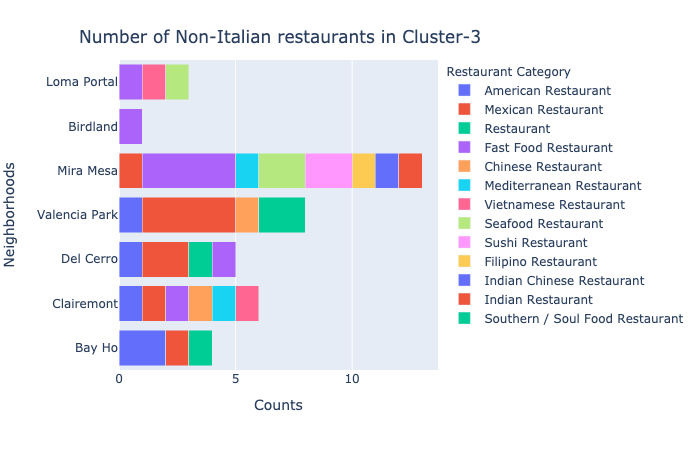

In [145]:
import plotly.express as px 

fig = px.bar(hoods_no_italian_rests, x="Counts", y="Neighborhoods",
             color="Restaurant Category", hover_data=['Restaurant Category'], 
             barmode = 'stack', orientation='h') 

fig.update_layout(
    title={
        'text': "Number of Non-Italian restaurants in Cluster-3",
        'y':0.93,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})

# save figure
fig.write_image("../images/sd_cluster3_hoods_non_italian_rests_fig23_a.png")
fig.show()
fig.show(renderer="png")

We have <b>7</b> neighborhoods within <b>Cluster-3</b> that have <b>no Italian restaurants</b>.  From the above barchart, we have chosen neighborhoods having restaurants of 4 or more different categories and these are as follows:
1. Mira Mesa
- Valencia Park
- Clairemont
- Del Cerro

### F. Importing and Merging demographical dataset

In this section, we will import <b>demographical</b> dataset and perform basic <b>exploratory data analysis</b> to get the <b>demographical information</b> such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>,   <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> of these selected <b>4</b> neighborhoods from <b>Cluster-0</b>, <b>14</b> neighborhoods from <b>Cluster-1</b>, and <b>4</b> neighborhoods from <b>Cluster-3</b>. Then, we will merge <b>demographical</b> dataset to the dataframe <b>sd_merged</b> to get the final dataframe. Finally, we will filter out <b>few most adequate neighborhoods</b> based on this new <b>merged dataset</b>.

#### Import demographical dataset

In [186]:
# Drop all the rows with missing value
sd_demo.dropna(axis=0, inplace=True, how ='any')
sd_demo_clean = sd_demo.reset_index(drop=True)
print(sd_demo_clean.shape)
sd_demo_clean.head()

(8, 13)


,Neighborhoods,Population,Median Home Value,Median Rent,Median Household Income,Diversity,Housing,Cost of Living,Weather,Commute,Crime and Safety,Walkable to Restaurants,Parking
0,Mission Valley East,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,7.9,4.8
1,Mission Valley West,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,4.8,5.8
2,Linda Vista,38659.0,493701.0,1782.0,66863.0,8.0,3.0,2.0,8.0,8.0,5.0,5.2,6.9
3,Rancho Peasquitos,60519.0,797946.0,2559.0,144186.0,8.0,5.4,2.0,8.0,6.0,6.6,4.5,8.8
4,Serra Mesa,32491.0,547197.0,2190.0,82307.0,8.0,3.4,2.0,8.0,6.6,6.0,4.7,6.3


Now, we will create a new dataframe by summing up the ratings of features - <b>Diversity</b>, <b>Commute</b>, <b>Crime and Safety</b>, <b>Walkable to Restaurants</b>, and <b>Parking</b>; and add a new column <b>Overall Rating</b>.

In [189]:
sd_demo_clean['Overall Rating'] = sd_demo_clean[["Diversity", "Commute", "Crime and Safety", "Walkable to Restaurants", "Parking"]].sum(axis=1)
sd_demo_clean.head(8)

,Neighborhoods,Population,Median Home Value,Median Rent,Median Household Income,Diversity,Housing,Cost of Living,Weather,Commute,Crime and Safety,Walkable to Restaurants,Parking,Overall Rating
0,Mission Valley East,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,7.9,4.8,32.7
1,Mission Valley West,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,4.8,5.8,30.6
2,Linda Vista,38659.0,493701.0,1782.0,66863.0,8.0,3.0,2.0,8.0,8.0,5.0,5.2,6.9,33.1
3,Rancho Peasquitos,60519.0,797946.0,2559.0,144186.0,8.0,5.4,2.0,8.0,6.0,6.6,4.5,8.8,33.9
4,Serra Mesa,32491.0,547197.0,2190.0,82307.0,8.0,3.4,2.0,8.0,6.6,6.0,4.7,6.3,31.6
5,Mira Mesa,87785.0,533150.0,2140.0,101381.0,8.0,4.6,2.0,8.0,7.4,5.4,6.6,7.3,34.7
6,Clairemont,89234.0,601041.0,1949.0,88347.0,8.0,3.4,2.0,8.0,7.4,4.5,7.6,8.5,36.0
7,Tierrasanta,35542.0,576392.0,2326.0,98759.0,8.0,4.0,2.0,8.0,6.6,6.0,5.7,8.3,34.6


## 5. Results

### A. List of the top 8 Neighborhoods

In [190]:
# print the list of 8 neighborhoods
print("Top 8 neighborhoods are: ")
print(list(sd_demo_clean['Neighborhoods']))

Top 8 neighborhoods are: 
['Mission Valley East', 'Mission Valley West', 'Linda Vista', 'Rancho Peasquitos', 'Serra Mesa', 'Mira Mesa', 'Clairemont', 'Tierrasanta']


### B. Create a barplot of 'Neighborhoods' vs 'Overall Rating'

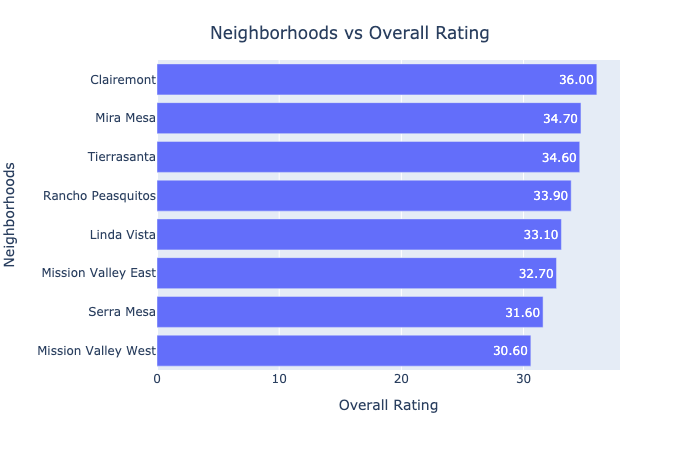

In [191]:
# create a barplot of 'Neighborhoods' vs 'Overall Rating'
import plotly.express as px 
hoods_rating = sd_demo_clean.sort_values(by="Overall Rating", ascending=True, ignore_index=True)

fig = px.bar(hoods_rating, x="Overall Rating", y="Neighborhoods", orientation='h', text="Overall Rating") 

fig.update_layout(
    title={
        'text': "Neighborhoods vs Overall Rating",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(texttemplate='%{text:.4s}', textposition='inside')

# save figure
fig.write_image("../images/result2_neighborhoods_vs_rating_fig26_b1.png")
fig.show()
fig.show(renderer="png")

### C. Create the final dataframe 'sd_selected_neighborhoods'

Let’s merge <b>demographical</b> information about these neighborhoods with <b>selected neighborhoods</b> data from <b>Cluster-0</b>, <b>Cluster-1</b>, and <b>Cluster-3</b> in our final dataframe '<b>sd_selected_neighborhoods</b>'.

In [205]:
# merge 'sd_demo_clean' to 'sd_merged' on 'Neighborhoods'
sd_selected_neighborhoods = sd_demo_clean.join(sd_merged.set_index('Neighborhoods'), on='Neighborhoods').reset_index(drop=True)
print(sd_selected_neighborhoods.shape[0])
sd_selected_neighborhoods.head(8)

8


,Neighborhoods,Population,Median Home Value,Median Rent,Median Household Income,Diversity,Housing,Cost of Living,Weather,Commute,Crime and Safety,Walkable to Restaurants,Parking,Overall Rating,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mission Valley East,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,7.9,4.8,32.7,32.770502,-117.154070,0,Office,Lawyer,Building,Medical Center,Government Building,Real Estate Office,Electronics Store,Furniture / Home Store,Bank,Financial or Legal Service
1,Mission Valley West,31911.0,518367.0,2121.0,90192.0,8.0,4.0,2.0,8.0,7.4,4.6,4.8,5.8,30.6,32.770502,-117.154070,0,Office,Lawyer,Building,Medical Center,Government Building,Real Estate Office,Electronics Store,Furniture / Home Store,Bank,Financial or Legal Service
2,Linda Vista,38659.0,493701.0,1782.0,66863.0,8.0,3.0,2.0,8.0,8.0,5.0,5.2,6.9,33.1,32.789841,-117.167646,1,Mobile Phone Shop,Salon / Barbershop,Church,Medical Center,Mexican Restaurant,Gas Station,Fast Food Restaurant,Vietnamese Restaurant,Miscellaneous Shop,School
3,Rancho Peasquitos,60519.0,797946.0,2559.0,144186.0,8.0,5.4,2.0,8.0,6.0,6.6,4.5,8.8,33.9,32.957710,-117.128540,1,Bank,Salon / Barbershop,Dentist's Office,Dessert Shop,Cosmetics Shop,Automotive Shop,Ice Cream Shop,Gym / Fitness Center,Spa,Gas Station
4,Serra Mesa,32491.0,547197.0,2190.0,82307.0,8.0,3.4,2.0,8.0,6.6,6.0,4.7,6.3,31.6,32.802899,-117.138774,1,Salon / Barbershop,Dentist's Office,School,Office,Playground,Park,Video Store,Gym / Fitness Center,Elementary School,Smoke Shop
5,Mira Mesa,87785.0,533150.0,2140.0,101381.0,8.0,4.6,2.0,8.0,7.4,5.4,6.6,7.3,34.7,32.915602,-117.143923,3,Dentist's Office,Medical Center,Fast Food Restaurant,Doctor's Office,Financial or Legal Service,Salon / Barbershop,Grocery Store,Shopping Mall,Bank,Nail Salon
6,Clairemont,89234.0,601041.0,1949.0,88347.0,8.0,3.4,2.0,8.0,7.4,4.5,7.6,8.5,36.0,32.819505,-117.182340,3,Doctor's Office,Dentist's Office,Bank,Chiropractor,Office,Mobile Phone Shop,Medical Center,ATM,Bakery,Credit Union
7,Tierrasanta,35542.0,576392.0,2326.0,98759.0,8.0,4.0,2.0,8.0,6.6,6.0,5.7,8.3,34.6,32.829216,-117.103643,1,Salon / Barbershop,Dentist's Office,Elementary School,Pool,Laundry Service,Nail Salon,Bank,Coffee Shop,Playground,Pizza Place


### D. Create a map of San Diego with the selected 8 neighborhoods superimposed on top

Now, let's create a map of San Diego using <b>folium</b> library, and display the map with the selected <b>8</b> neighborhoods superimposed on top. Note that <b>size of each circle</b> is corresponding to <b>overall rating</b>.

In [197]:
# create map of San Diego using latitude and longitude values
sd_map = folium.Map(location=[32.7174202, -117.1627728], zoom_start=10)
# ratings = 

# add markers to map
for lat, lng, neighborhood, i in zip(sd_selected_neighborhoods['Latitude'], sd_selected_neighborhoods['Longitude'], 
                                     sd_selected_neighborhoods['Neighborhoods'], sd_selected_neighborhoods['Overall Rating']):
    label = '{}\nRating: {:0.2f}'.format(neighborhood, i)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=float(i/5),
        popup=label,
        color='red',
        fill=True,
        fill_color='royalblue',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(sd_map)

# display the map
sd_map

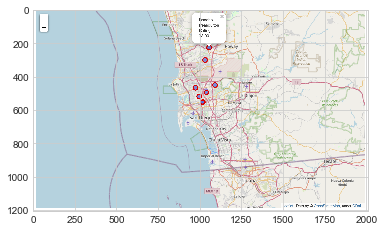

In [198]:
# display the static figure of San Diego map with resulting clusters
image = mpimg.imread("../images/result4_sd_map_selected_hoods_rating_fig26_d.png")
plt.imshow(image)
plt.show()

## 6. Discussion

As I have mentioned before, being so attractive economically and geographically, <b>San Diego</b> draws in people like a magnet. Business owners often consider San Diego city as a good destination for moving and expanding their business because of housing and low cost of doing business as compared to Los Angeles and San Francisco areas. Also, its year-around good weather tremendously helps small businessess that rely on foot traffic.

I have used <b>exploratory data analysis</b> and <b><i>K</i>-means clustering</b> algorithm for modeling in order to discover a few precise locations for opening up an <b>Italian</b> restaurant considering following elements:
- Know the neighborhood, specifically, who else is doing business in the neighborhood
- Find a place which is not crowded with similar restaurants in vicinity
- Accessibility and visibility of the location
- Population base to know the foot traffic or car traffic in the area to support the business
- Parking
- Diversity (based on ethnic and economic diversity)
- Commute
- Crime and Safety (based on violent and property crime rates)

I have used the <b><i>K</i>-means clustering</b> algorithm as part of this cluster modeling. To get the optimal value of the $k$, I used the <b>Elbow Method</b> and set the optimum $k$ value to <b>6</b>.

I have assigned name to the $6$ clusters depending on the characteristics and different venues of each cluster as follows: 
1. Cluster-0: <b>offices and automotive shops</b> 
- Cluster-1: <b>Multiple Venues - residential buildings, college and academic buildings, Salon, office, bank, restaurants, park, salon</b>       
- Cluster-2: <b>Government buildings</b>
- Cluster-3: <b>Doctor's and dentist's place</b> 
- Cluster-4: <b>Zoo exhibit</b> 
- Cluster-5: <b>Automotive shops</b>

I have selected <b>Cluster-0</b>, <b>Cluster-1</b>, and <b>Cluster-3</b> for further analysis. I have performed explanatory data analysis and derived relevant information about each neighborhood as given below:  
- Number of neighborhoods in Cluster-0, Cluster-1, Cluster-3 are $20$, $47$, and $9$ respectively.
- Total number of restaurants in Cluster-0, Cluster-1, Cluster-3 are $97$, $304$, and $50$ respectively.
- Number of unique restaurants category in Cluster-0, Cluster-1, Cluster-3 are $22$, $33$, and $15$ respectively 
- Number of neighborhoods with no Italian restaurants in Cluster-0, Cluster-1, Cluster-3 are $13$, $31$, and $7$ respectively. 

Then, I have selected <b>4</b> neighborhoods from <b>Cluster-0</b>, <b>14</b> neighborhoods from <b>Cluster-1</b> and <b>4</b> neighborhoods from <b>Cluster-3</b> having restaurants of 4 or more different categories, but have no Italian retaurants.

Also, I have imported <b>demographical</b> dataset and performed basic <b>exploratory data analysis</b> to get the <b>demographical information</b> such as <b>Population</b>, <b>Median Home Value</b>, <b>Median Rent</b>, <b>Median Household Income</b>, <b>Diversity</b>, <b>Cost of Living</b>, <b>Commute</b>, <b>Parking</b>, <b>Walkable to Restaurants</b>, and <b>Crime and Safety</b> of these selected neighborhoods. Then, I have merged <b>demographical</b> data to the <b>neighborhoods-venues</b> data to get the final dataframe.

I have chosen following <b>8</b> neighborhoods based on above analysis: 
1. <b>Clairemont</b> 
2. <b>Mira Mesa</b>
3. <b>Tierrasanta</b> 
4. <b>Rancho Penasquitos</b>
5. <b>Linda Vista</b> 
6. <b>Mission Valley East</b> 
7. <b>Serra Mesa</b> 
8. <b>Mission Valley West</b>

Finally, I have ended the study by visualizing the map of San Diego with the selected top <b>8</b> neighborhoods along with their demographic overall rating superimposed on top.

## 7. Conclusion

Objective of this project was to discover a few promising neighborhoods of San Diego with having no <b>Italian</b> restaurants in the vicinity so that the <b>stakeholders</b> -- more specifically, the <b>restaurant entrepreneurs</b> can select a optimal location for opening up a new <b>Italian Restaurant</b>.

By using Foursquare API, basic exploratory data analysis, and <b><i>K</i>-means clustering</b> algorithm, I have first identified some neighborhoods of three selected clusters of interest. Then, I have explored these three clusters to find out the locations which satisfy some basic requirements of this project. Then, I have merged demographical information of San Diego with these chosen neighborhoods to find more precise locations for an Italian restaurant. 

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics and locations of these neighborhoods.